1-B

In [25]:
import numpy as np

def rec_bb(t: list, f: int, l: int, key: int):
    if l < f:
        return None
    root = (f+l)//2
    if key < t[root]:
        return rec_bb(t, f, root-1, key)
    elif key > t[root]:
        return rec_bb(t, root+1, l, key)
    
    return root



def bb(t: list, f: int, l: int, key: int):
    
    while f <= l:
        root = (f+l)//2 # 0 6 r3// 4 6 r5
        if t[root] > key: # 3
            l = root-1
        elif t[root] < key:
            f = root+1
        elif t[root] == key:
            return root
    
    return None


# timings para bb recursiva 
l_timings_rec = [] 
l_timings_ite = []
for i, size in enumerate(range(5, 15)):
    t = list(range(2**i * size))
    key = t[len(t)//2]
    #print(t)
    timings_rec = %timeit -n 100 -r 10 -o -q rec_bb(t, 0, len(t) - 1, key)
    timings_ite = %timeit -n 100 -r 10 -o -q bb(t, 0, len(t) - 1, key)
    l_timings_rec.append([int(len(t)), timings_rec.best])
    l_timings_ite.append([int(len(t)), timings_ite.best])

a_timings_rec = np.array(l_timings_rec)
a_timings_ite = np.array(l_timings_ite)

a_timings_rec
a_timings_ite





array([[5.00000000e+00, 1.40999909e-07],
       [1.20000000e+01, 2.35999469e-07],
       [2.80000000e+01, 2.94002239e-07],
       [6.40000000e+01, 3.76999378e-07],
       [1.44000000e+02, 5.00001479e-07],
       [3.20000000e+02, 5.95999882e-07],
       [7.04000000e+02, 7.44999852e-07],
       [1.53600000e+03, 8.65000766e-07],
       [3.32800000e+03, 8.94998666e-07],
       [7.16800000e+03, 8.79999716e-07]])

1-C

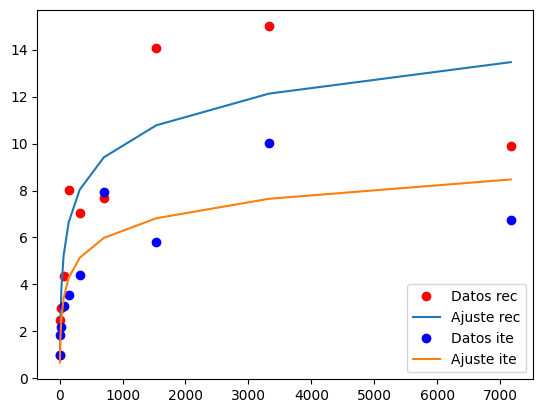

In [8]:
from scipy.optimize import curve_fit
import math

def tofit(x, a, b):
    return a * np.log(x) + b # f(x) = x**3 for matrix mult

x = a_timings_rec[: , 0]
y = a_timings_rec[: , 1]
y = y / y[0] #normalizar timings
pars, _ = curve_fit(tofit, x, y)
a, b = pars
plt.plot(x, y, 'ro', label='Datos rec')
plt.plot(x, tofit(x, a, b), label='Ajuste rec')
#plt.legend()
#plt.show()

x1 = a_timings_ite[: , 0]
y1 = a_timings_ite[: , 1]
y1 = y1 / y1[0] #normalizar timings
pars, _ = curve_fit(tofit, x1, y1)
a, b = pars
plt.plot(x1, y1, 'bo', label='Datos ite')
plt.plot(x1, tofit(x1, a, b), label='Ajuste ite')
plt.legend()
plt.show()





A2

In [22]:
import numpy as np

non_min = np.ndarray([20, 5, 4, 9, 6, 10, 15])

def min_heapify(h: np.ndarray, i: int):
    while 2*i+1 < h.shape[0]:
        next_i = i
        if h[next_i] > h[2*i+1]:
            next_i = 2*i+1
        if 2*i+2 < h.shape[0] and h[next_i] > h[2*i+2]:
            next_i = 2*i+2
        if next_i > i:
            h[i], h[next_i] = h[next_i], h[i]
            i = next_i
        else:
            return



print(min_heapify(non_min, 0))


def insert_min_heap(h: np.ndarray, k: int):
    h += [k]
    j = h.shape[0] - 1
    while j >= 1 and h[(j-1) // 2] > h[j]:
        h[(j-1) // 2], h[j] = h[j], h[(j-1) // 2]
        j = (j-1) // 2


    return h

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()